🏦 India Bank Customer Churn Prediction System

✅ STEP 0: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


✅ STEP 1: Load Dataset

In [2]:
df = pd.read_csv(r"C:\Users\dhama\Desktop\IndiaBankChurnPrediction\indian_bank_customer_churn.csv")

✅STEP 2: Basic Data Checks

In [3]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CustomerID            100000 non-null  int64  
 1   Age                   100000 non-null  int64  
 2   Gender                100000 non-null  object 
 3   State                 100000 non-null  object 
 4   Account_Type          100000 non-null  object 
 5   Tenure_Years          100000 non-null  int64  
 6   Balance_INR           100000 non-null  float64
 7   Num_Products          100000 non-null  int64  
 8   Has_Credit_Card       100000 non-null  int64  
 9   Is_Active_Member      100000 non-null  int64  
 10  Estimated_Salary_INR  100000 non-null  int64  
 11  Credit_Score          100000 non-null  int64  
 12  Churn                 100000 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 9.9+ MB


,CustomerID,Age,Tenure_Years,Balance_INR,Num_Products,Has_Credit_Card,Is_Active_Member,Estimated_Salary_INR,Credit_Score,Churn
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.00000
mean,1.050000e+06,46.033670,6.992280,150382.878712,2.494490,0.650000,0.599300,1.556910e+06,649.420970,0.37820
std,2.886766e+04,16.433943,4.319471,106319.165300,1.117006,0.476972,0.490043,8.313798e+05,79.904486,0.48494
min,1.000001e+06,18.000000,0.000000,514.800000,1.000000,0.000000,0.000000,1.200160e+05,300.000000,0.00000
25%,1.025001e+06,32.000000,3.000000,72121.847500,1.000000,0.000000,0.000000,8.357930e+05,595.000000,0.00000
50%,1.050000e+06,46.000000,7.000000,126393.120000,2.000000,1.000000,1.000000,1.554270e+06,650.000000,0.00000
75%,1.075000e+06,60.000000,11.000000,202535.160000,3.000000,1.000000,1.000000,2.281477e+06,703.000000,1.00000
max,1.100000e+06,74.000000,14.000000,995792.560000,4.000000,1.000000,1.000000,2.999990e+06,900.000000,1.00000


✅STEP 3:FEATURE ENGINEERING

In [4]:
df['Balance_to_Salary'] = df['Balance_INR'] / df['Estimated_Salary_INR']
df['Tenure_NumProducts'] = df['Tenure_Years'] * df['Num_Products']
df['Low_Credit_Score'] = (df['Credit_Score'] < 600).astype(int)
df['HighBalance_LowActivity'] = (
(df['Balance_INR'] > 100000) & (df['Is_Active_Member'] == 0)
).astype(int)

In [5]:
df.to_csv("indian_bank_customer_churn_featured1.csv", index=False)
df.head(5)

,CustomerID,Age,Gender,State,Account_Type,Tenure_Years,Balance_INR,Num_Products,Has_Credit_Card,Is_Active_Member,Estimated_Salary_INR,Credit_Score,Churn,Balance_to_Salary,Tenure_NumProducts,Low_Credit_Score,HighBalance_LowActivity
0,1000001,56,Female,Telangana,Savings,12,385096.49,4,1,1,2012330,592,0,0.191368,48,1,0
1,1000002,69,Male,Tamil Nadu,Savings,6,63323.38,2,0,1,1349914,656,1,0.046909,12,0,0
2,1000003,46,Male,Gujarat,Salary,0,78554.85,4,1,1,1533412,586,1,0.051229,0,1,0
3,1000004,32,Female,Telangana,Savings,11,159944.95,4,1,1,1489719,599,1,0.107366,44,1,0
4,1000005,60,Male,Maharashtra,Savings,6,193704.64,1,1,1,2832618,787,1,0.068384,6,0,0


✅STEP 4:Feature and Target column

In [6]:
X = df.drop('Churn', axis=1)
y = df['Churn']

✅STEP 5: Separate Numerical and Categorical columns

In [7]:
categorical_cols = ['Gender', 'State', 'Account_Type']


numerical_cols = [
'Age', 'Tenure_Years', 'Balance_INR', 'Num_Products',
'Has_Credit_Card', 'Is_Active_Member',
'Estimated_Salary_INR', 'Credit_Score',
'Balance_to_Salary', 'Tenure_NumProducts',
'Low_Credit_Score', 'HighBalance_LowActivity'
]

✅STEP 6: Split Train-Test Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

✅STEP 7:Standardize numerical columns(Scaling)

In [9]:
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numerical_cols])
X_test_num = scaler.transform(X_test[numerical_cols])

✅STEP 8:One-Hot-Encode the Categorical columns

In [10]:
encoder = OneHotEncoder(
drop='first',
sparse_output=False,
handle_unknown='ignore'
)


X_train_cat = encoder.fit_transform(X_train[categorical_cols])
X_test_cat = encoder.transform(X_test[categorical_cols])

✅STEP 9:Create Final Feature Names 

In [11]:
cat_feature_names = encoder.get_feature_names_out(categorical_cols)


final_feature_names = np.concatenate([
numerical_cols,
cat_feature_names
])

✅STEP 10:Combine Numerical and Categorical column for final training and testing


In [12]:
X_train_final = np.concatenate([X_train_num, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num, X_test_cat], axis=1)

In [13]:
current_cat_feature_names = encoder.get_feature_names_out(categorical_cols)
current_feature_names = np.concatenate([numerical_cols, current_cat_feature_names])


In [14]:

X_train_final = pd.DataFrame(X_train_final, columns=current_feature_names)
X_test_final = pd.DataFrame(X_test_final, columns=current_feature_names)


In [ ]:
for col in final_feature_names:
    if col not in X_train_final.columns:
        X_train_final[col] = 0
    if col not in X_test_final.columns:
        X_test_final[col] = 0

X_train_final = X_train_final[final_feature_names]
X_test_final = X_test_final[final_feature_names]


In [18]:
list(final_feature_names)

['Age',
 'Tenure_Years',
 'Balance_INR',
 'Num_Products',
 'Has_Credit_Card',
 'Is_Active_Member',
 'Estimated_Salary_INR',
 'Credit_Score',
 'Balance_to_Salary',
 'Tenure_NumProducts',
 'Low_Credit_Score',
 'HighBalance_LowActivity',
 'Gender_Male',
 'State_Gujarat',
 'State_Karnataka',
 'State_Maharashtra',
 'State_Tamil Nadu',
 'State_Telangana',
 'State_Uttar Pradesh',
 'State_West Bengal',
 'Account_Type_Salary',
 'Account_Type_Savings']

🌲 RANDOM FOREST MODEL (MODEL 1)


✅ STEP 11: Train Random Forest

In [17]:
rf = RandomForestClassifier(
n_estimators=200,
random_state=42

)
rf.fit(X_train_final, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


✅ STEP 12:Model Evaluation

In [18]:
rf_pred = rf.predict(X_test_final)


print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

Random Forest Accuracy: 0.6472
              precision    recall  f1-score   support

           0       0.68      0.82      0.74     12422
           1       0.55      0.36      0.44      7578

    accuracy                           0.65     20000
   macro avg       0.62      0.59      0.59     20000
weighted avg       0.63      0.65      0.63     20000

[[10194  2228]
 [ 4828  2750]]


✅ STEP 13:Feature Importance

In [20]:
rf_importance = rf.feature_importances_


rf_fi_df = pd.DataFrame({
'Feature': final_feature_names,
'Importance': rf_importance
}).sort_values(by='Importance', ascending=False)


rf_fi_df.head(15)

,Feature,Importance
7,Credit_Score,0.135319
2,Balance_INR,0.131895
8,Balance_to_Salary,0.128999
6,Estimated_Salary_INR,0.128983
0,Age,0.110703
9,Tenure_NumProducts,0.064916
1,Tenure_Years,0.059520
5,Is_Active_Member,0.047702
3,Num_Products,0.029245
4,Has_Credit_Card,0.018754


🚀  XGBOOST MODEL (MODEL 2)


✅ STEP 14:Train the model

In [21]:
from xgboost import XGBClassifier


In [22]:
xgb_model = XGBClassifier(
random_state=42) 
xgb_model.fit(X_train_final, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


✅ STEP 15:Model Evaluation

In [23]:
y_pred = xgb_model.predict(X_test_final)
y_prob = xgb_model.predict_proba(X_test_final)[:,1]


print("XGBOOST MODEL ACCURACY:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

XGBOOST MODEL ACCURACY: 0.64905
              precision    recall  f1-score   support

           0       0.68      0.82      0.74     12422
           1       0.55      0.38      0.45      7578

    accuracy                           0.65     20000
   macro avg       0.62      0.60      0.60     20000
weighted avg       0.63      0.65      0.63     20000

[[10136  2286]
 [ 4733  2845]]


✅ STEP 16: Hyperparameter tuning

In [24]:

scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

param_grid = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.85, 1.0],
    'colsample_bytree': [0.7, 0.85, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.7, 1, 1.3]
}

xgb_model1 = XGBClassifier(
    random_state=42,
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight
)

grid_search = RandomizedSearchCV(
    estimator=xgb_model1,
    param_distributions=param_grid,
    cv=3,
    scoring="recall",   
    n_iter=30,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

grid_search.fit(X_train_final, y_train)
best_xgb = grid_search.best_estimator_
print("BEST PARAMETERS:", grid_search.best_params_)
print("BEST CV RECALL:", grid_search.best_score_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
BEST PARAMETERS: {'subsample': 1.0, 'reg_lambda': 1.3, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.85}
BEST CV RECALL: 0.6363666634913288


✅ STEP 17:Prediction and Model Evalauation after Hyperparameter Tuning

In [25]:
y_prob = best_xgb.predict_proba(X_test_final)[:,1]
y_pred = (y_prob >= 0.3).astype(int)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.25      0.38     12422
           1       0.42      0.90      0.58      7578

    accuracy                           0.49     20000
   macro avg       0.61      0.57      0.48     20000
weighted avg       0.66      0.49      0.45     20000

[[3049 9373]
 [ 733 6845]]


✅ Step 18:Feature Importance

                    Feature  Importance
11  HighBalance_LowActivity    0.455622
5          Is_Active_Member    0.379615
3              Num_Products    0.053252
1              Tenure_Years    0.029051
7              Credit_Score    0.020464
2               Balance_INR    0.006160
9        Tenure_NumProducts    0.004912
20      Account_Type_Salary    0.004603
15        State_Maharashtra    0.003953
16         State_Tamil Nadu    0.003933
21     Account_Type_Savings    0.003769
4           Has_Credit_Card    0.003687
14          State_Karnataka    0.003661
19        State_West Bengal    0.003406
0                       Age    0.003275


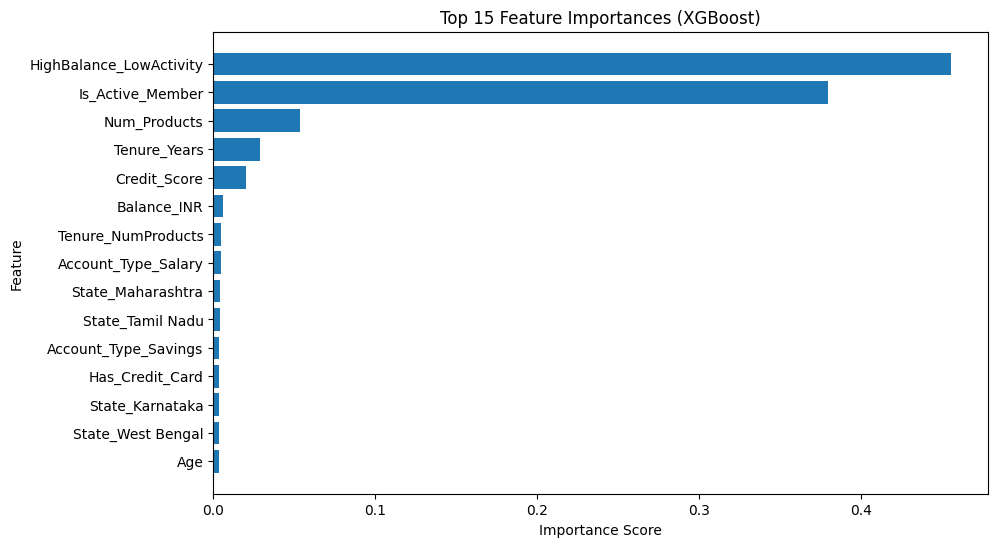

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

importances = best_xgb.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X_train_final.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feature_importance_df.head(15)) 


plt.figure(figsize=(10,6))
plt.barh(feature_importance_df["Feature"].head(15)[::-1],
         feature_importance_df["Importance"].head(15)[::-1])
plt.title("Top 15 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

✅ STEP 19:Save the Final trained Model (XGBOOST MODEL)

In [39]:
import pickle

In [40]:
pickle.dump(best_xgb, open("xgb_model.pkl", "wb"))
pickle.dump(final_feature_names, open("model_features.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(encoder, open("encoder.pkl", "wb"))



